# Telco Customer Churn Prediction

## Project Overview

Customer churn prediction is an important task for subscription-based businesses.
In this project, we analyze the Telco Customer Churn dataset and build supervised learning models to predict whether a customer will churn or not.

Logistic Regression and K-Nearest Neighbors (KNN) models are evaluated using metrics aligned with business objectives, with a main focus on recall and AUC.

## Business Problem
The main goal of this project is to predict whether a customer will churn 
(cancel their subscription) based on demographic, service usage, and 
billing information.

## Target Variable
Churn (Yes / No)

## Problem Type
Binary Classification

## Cost of Errors
False Negatives (predicting "No churn" for a customer who will churn) 
are more costly due to potential revenue loss.

## Models Used
- Logistic Regression (main model)
- k-Nearest Neighbors (comparison model)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , roc_auc_score

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Overview
In this section, we will perform an basic exploration of the dataset
to understand its structure, feature types, and potential issues if there is any.

In [3]:
display(df.info())
display(df.describe())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


(7043, 21)

## Exploratory Data Analysis (EDA)

### Target Variable Distribution
Understanding the distribution of the target variable is crucial.

In [4]:
# Target Variable Distribution
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
# Target Variable Distribution (Percentage)
df["Churn"].value_counts(normalize = True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

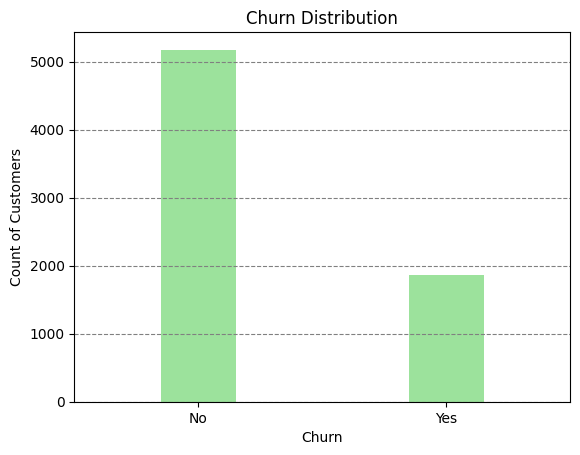

In [6]:
sns.countplot(data = df , x = "Churn" , color = "lightgreen" , width = 0.3)
plt.title("Churn Distribution")
plt.ylabel("Count of Customers")
plt.grid(True , axis = "y", color = "gray" , linestyle = "--")
plt.show()

From the distribution plot , we can see that the dataset is **imbalanced** , with significantly more non-churn customers than churn customers.

### EDA - Numerical Features Overview


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# I would also like to analyze the TotalCharges column too but right now it is stored as an object dtype due to some values. Let's fix that.
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = df["TotalCharges"].replace("" , np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we can see that we have missing values in the TotalCharges column.

## Data Preprocessing
In this section, data quality issues identified during EDA will be handled,
and the dataset will be prepared for modeling.

### Missing Value Operations

In [13]:
df = df.dropna(subset = ["TotalCharges"])
display(df.isna().sum())
display(df.shape)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

(7032, 21)

Since the proportion of missing values is very small (less than 5%), the corresponding rows were removed.

### Categorical Encoding

Categorical variables will be converted into numerical format using one-hot encoding to make them suitable for machine learning models.

Target variable column will be seperated before encoding.

In [14]:
y = df["Churn"]
X = df.drop(["Churn","customerID"] , axis = 1)

Let's also convert the target variable to binary values.

In [15]:
y = y.map({"Yes" : 1 , "No" : 0})
print(y.head(3))

0    0
1    0
2    1
Name: Churn, dtype: int64


In [16]:
X_encoded = pd.get_dummies(X, drop_first=True)

When applying one-hot encoding, one category from each categorical feature
is intentionally dropped (`drop_first = True`) to avoid the **dummy variable trap**.
Since the dropped category can be inferred from the remaining dummy variables,no information is lost.

In [17]:
display(X_encoded.shape)
display(X_encoded.columns)

(7032, 30)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [18]:
for col in X.columns:
    print(col , X[col].nunique())

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530


We can see that dummy operations are correctly done.

## Model Preparation

In this section, the dataset is prepared for machine learning models. This includes splitting the data into training and test sets and applying feature scaling to ensure optimal model performance.

### Train-Test Split



In [19]:
X_train , X_test , y_train , y_test = train_test_split(X_encoded,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 12,
                                                       stratify = y)

### Feature Scaling

Feature scaling was applied to ensure that all features contribute equally to the model, which is particularly important for distance-based algorithms such as k-Nearest Neighbors.


In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

Logistic Regression will be used as the main model due to its simplicity and interpretability for binary classification problems.

In [21]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled , y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

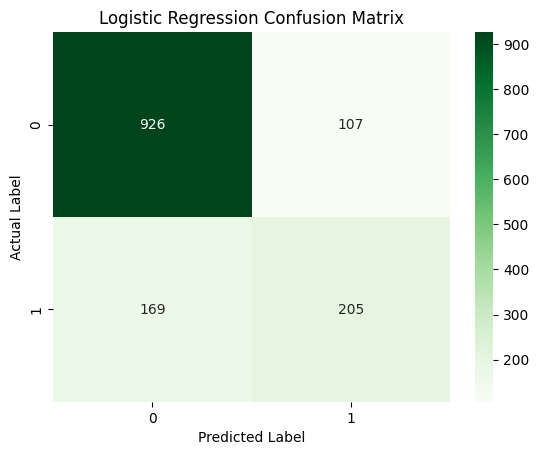

In [22]:
conf_matrix_log_reg = confusion_matrix(y_test , y_pred_log_reg)

sns.heatmap(conf_matrix_log_reg , annot=True , fmt = "d" , cmap = "Greens")

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

True Negatives = 926
False Positives = 107
False Negatives = 169
True Positives = 205

In [23]:
# Receiver Operating Characteristic Curve - Logistic Regression

y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[: ,1]

fpr , tpr ,threshold = roc_curve(y_test , y_prob_log_reg)

roc_auc_log_reg = roc_auc_score(y_test , y_prob_log_reg)

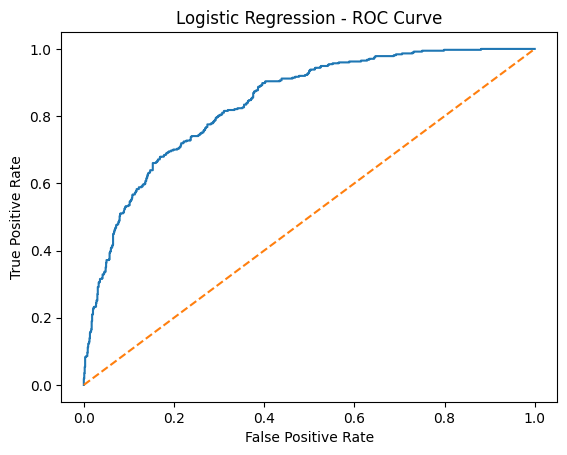

'Area under the ROC Curve : 0.8389690999166542'

In [24]:
plt.plot(fpr , tpr)
plt.plot([0,1] , [0,1] , linestyle ="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.show()

display(f"Area under the ROC Curve : {roc_auc_log_reg}")

The ROC curve graph shows the model’s ability to distinguish between churned and non-churned customers across different decision thresholds. The curve lies above the diagonal baseline, and the AUC value of approximately 0.80 indicates that the model can effectively separate churned customers from non-churned ones. This suggests that the model can effectively rank customers by their likelihood of churning, even though further threshold tuning may be required to optimize the model even more.

In [25]:
log_reg_report = pd.DataFrame(classification_report(y_test , y_pred_log_reg , output_dict = True))
display(log_reg_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.845662,0.657051,0.803838,0.751357,0.795527
recall,0.896418,0.548128,0.803838,0.722273,0.803838
f1-score,0.870301,0.597668,0.803838,0.733984,0.797831
support,1033.000000,374.000000,0.803838,1407.000000,1407.000000


### Logistic Regression – Evaluation

Although the Logistic Regression model achieves an overall accuracy of approximately 80%, the recall score for churned customers (class 1) remains relatively low (≈ 55%). This indicates that the model fails to identify around 45% of customers who actually churn.

The model appears to be conservative in predicting churn, prioritizing precision over recall.

However, the ROC curve suggests that the model has a good ability to distinguish between churned and non-churned customers. This implies that the model’s performance could potentially be improved by adjusting the decision threshold.

## K-Nearest Neighbors Model
Since KNN is sensitive to feature scales, the model is trained using the previously standardized features.


To determine the optimal number of neighbors for the KNN model, multiple k values will be evaluated. For each k value, the model performance will be measured using the AUC score.
The k value that achieves the best performance will selected as the optimal number of neighbors.

In [26]:
k_values = range(1,41)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled , y_train)

    y_prob = knn.predict_proba(X_test_scaled)[:,1]
    auc_score = roc_auc_score(y_test , y_prob)
    results.append(auc_score)

display(results)    

[np.float64(0.644942822680423),
 np.float64(0.7131712317066226),
 np.float64(0.7472356099000368),
 np.float64(0.767863706249903),
 np.float64(0.7785614817959218),
 np.float64(0.7868210031526471),
 np.float64(0.7883779138690591),
 np.float64(0.7965002510728836),
 np.float64(0.8030863846022436),
 np.float64(0.8069171873624923),
 np.float64(0.8116280394055008),
 np.float64(0.8132703666699452),
 np.float64(0.8146020883051803),
 np.float64(0.8149579905886495),
 np.float64(0.8181675820904795),
 np.float64(0.8165174896853046),
 np.float64(0.8171749382671312),
 np.float64(0.8201619290680279),
 np.float64(0.8193284706296494),
 np.float64(0.8188340900031579),
 np.float64(0.8200881602310905),
 np.float64(0.8213927038737698),
 np.float64(0.8226648927634066),
 np.float64(0.8231036232146647),
 np.float64(0.8228460793804453),
 np.float64(0.826012962608259),
 np.float64(0.8264141615459878),
 np.float64(0.8284628645086478),
 np.float64(0.830480506908387),
 np.float64(0.8314278540774755),
 np.float64(0.

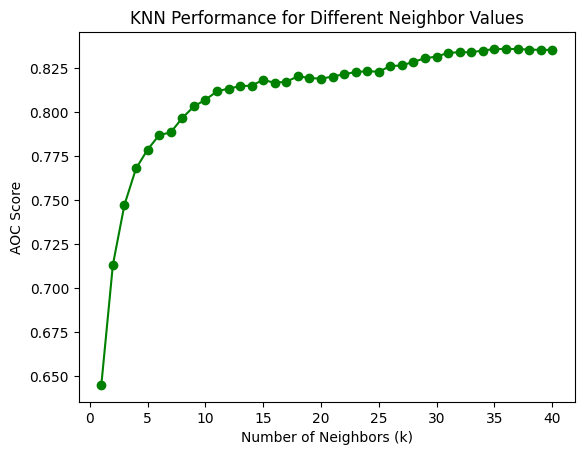

In [27]:
plt.plot(k_values , results , marker = "o" , color = "green")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("AOC Score")
plt.title("KNN Performance for Different Neighbor Values")

plt.show()

We can observe that after k = 31, the AUC curve reaches a plateau and shows very similar results for higher k values. Hence, k = 31 will be selected as the optimal number of neighbors for the model.

In [28]:
knn = KNeighborsClassifier(n_neighbors = 31)

knn.fit(X_train_scaled , y_train)

KNeighborsClassifier(n_neighbors=31)

In [29]:
y_pred_knn = knn.predict(X_test_scaled)

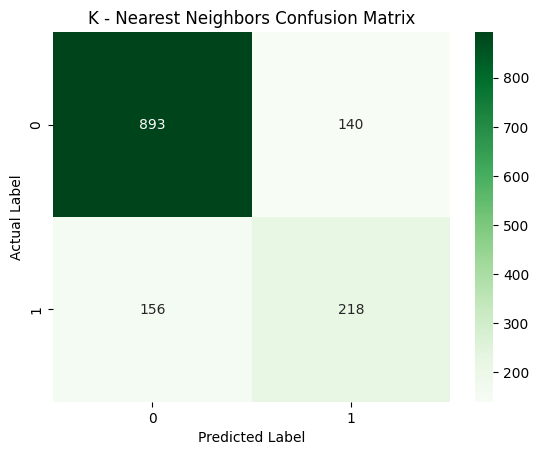

In [30]:
conf_matrix_knn = confusion_matrix(y_test , y_pred_knn)

sns.heatmap(conf_matrix_knn , annot = True , fmt ="d" , cmap = "Greens")

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("K - Nearest Neighbors Confusion Matrix")
plt.show()

True Negatives : 893
False Positives : 140
False Negatives : 156
True Positives : 218

In [31]:
# ROC Curve - K - Nearest Neighbors
y_prob_knn = knn.predict_proba(X_test_scaled)[: , 1]

fpr_knn , tpr_knn , threshold_knn = roc_curve(y_test , y_prob_knn)

roc_auc_knn = roc_auc_score(y_test , y_prob_knn)

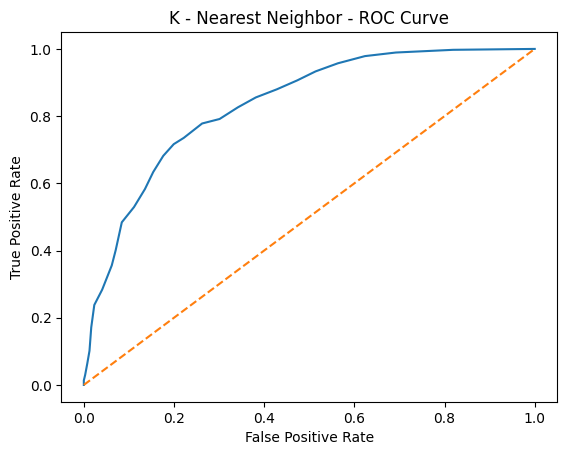

'Area under the ROC Curve : 0.8335787980597501'

In [32]:
plt.plot(fpr_knn , tpr_knn)
plt.plot([0,1] , [0,1] , linestyle = "--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K - Nearest Neighbor - ROC Curve")
plt.show()

display (f"Area under the ROC Curve : {roc_auc_knn}")

In [33]:
knn_report = pd.DataFrame(classification_report(y_test , y_pred_knn , output_dict = True))
display(knn_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.851287,0.608939,0.789623,0.730113,0.786867
recall,0.864472,0.582888,0.789623,0.723680,0.789623
f1-score,0.857829,0.595628,0.789623,0.726729,0.788132
support,1033.000000,374.000000,0.789623,1407.000000,1407.000000


### KNN Model - Evaluation

The KNN model demonstrates strong performance in predicting non-churned customers (class 0), with high precision (85%) and recall (86%).

However, the recall score for churned customers (class 1) remains relatively moderate at approximately 58%, indicating that the model still fails to identify nearly 40% of actual churns.

Although the overall accuracy is close to 79%, this metric is influenced by the class imbalance in the dataset.

In [34]:
comparison_df = pd.DataFrame({
    "Metric (Class 1 - Churn)": ["Recall", "Precision", "F1-score", "AUC", "Accuracy"],
    "Logistic Regression": [0.55, 0.66, 0.60, 0.80, 0.80],
    "KNN (k = 31)": [0.58, 0.61, 0.60, 0.84, 0.79]
})

display(comparison_df)

,Metric (Class 1 - Churn),Logistic Regression,KNN (k = 31)
0,Recall,0.55,0.58
1,Precision,0.66,0.61
2,F1-score,0.60,0.60
3,AUC,0.80,0.84
4,Accuracy,0.80,0.79


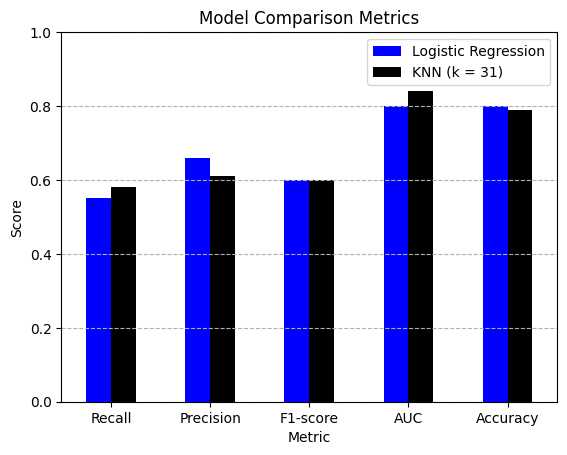

In [35]:
comparison_df.set_index("Metric (Class 1 - Churn)").plot(kind = "bar" , color= ["blue","black"])
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0,1)
plt.xticks(rotation = 0)
plt.grid(True , linestyle = "--" , axis = "y")
plt.show()

## Conclusion

The latest bar plot compares the performance of Logistic Regression and KNN (k = 31) across key evaluation metrics for churn prediction.

- Both models achieve similar F1-scores, which shows a comparable balance between precision and recall.
- KNN slightly performs better than Logistic Regression in terms of recall, meaning it identifies more actually churned customers.
- Logistic Regression shows higher precision than KNN , resulting in fewer false positive churn predictions.
- The AUC score of KNN is noticeably higher, which indicates that KNN model has better overall ability to separate churned and non-churned customers across different thresholds.
- Since missing churned customers is usually more costly than incorrectly identifying a customer as churned it can be said that higher recall and AOC scores can be used as main performance metrics.
- Based on the comparison of two metrics and visual analysis, the KNN model (k = 31) will be selected as the final model. It provides improved churn detection capability and stronger overall class separation compared to the Logistic Regression model.